#### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import missingno as msno
import seaborn as sns
import statsmodels.api as sm


#### Read data

In [3]:
path = r"c:\Users\elise\OneDrive - NTNU\Documents\A.NTNU7\Applied data science\consumption_temp.csv"
data = pd.read_csv(path)

### Exploratory Data Analysis (EDA)

##### Columns
<b>Time</b>: time (in UTC), hourly values

<b>Location</b>: Biggest city in the price area, hence representative of the weather in that price area

<b>Consumption</b>: Average hourly consumption (in MW)

<b>Temperature</b>: Weather forecast for the location for that hour, available at the forecasting time (in degrees Celsius)

In [4]:
data.head()

,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8


In [5]:
data.describe()

,consumption,temperature
count,49494.000000,49494.000000
mean,3.509242,6.554019
std,3.096356,7.630308
min,0.000000,-17.299999
25%,1.263256,1.000000
50%,2.376530,6.800000
75%,5.189000,12.100000
max,18.045011,30.500000


#### Missing values
There are no missing values in the dataset.

<Axes: >

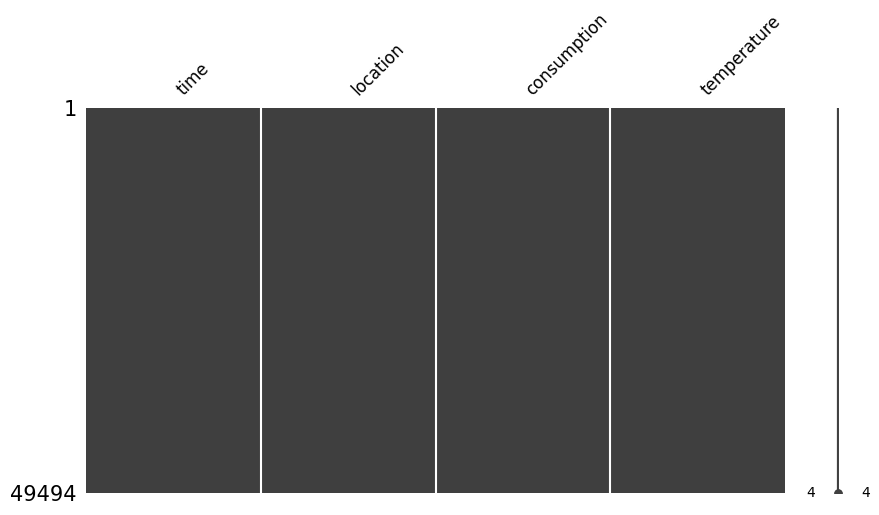

In [6]:
msno.matrix(data, figsize=(10,5), fontsize=12)

#### Visualization of consumption on a map

#### Consumption and Temperature visualized

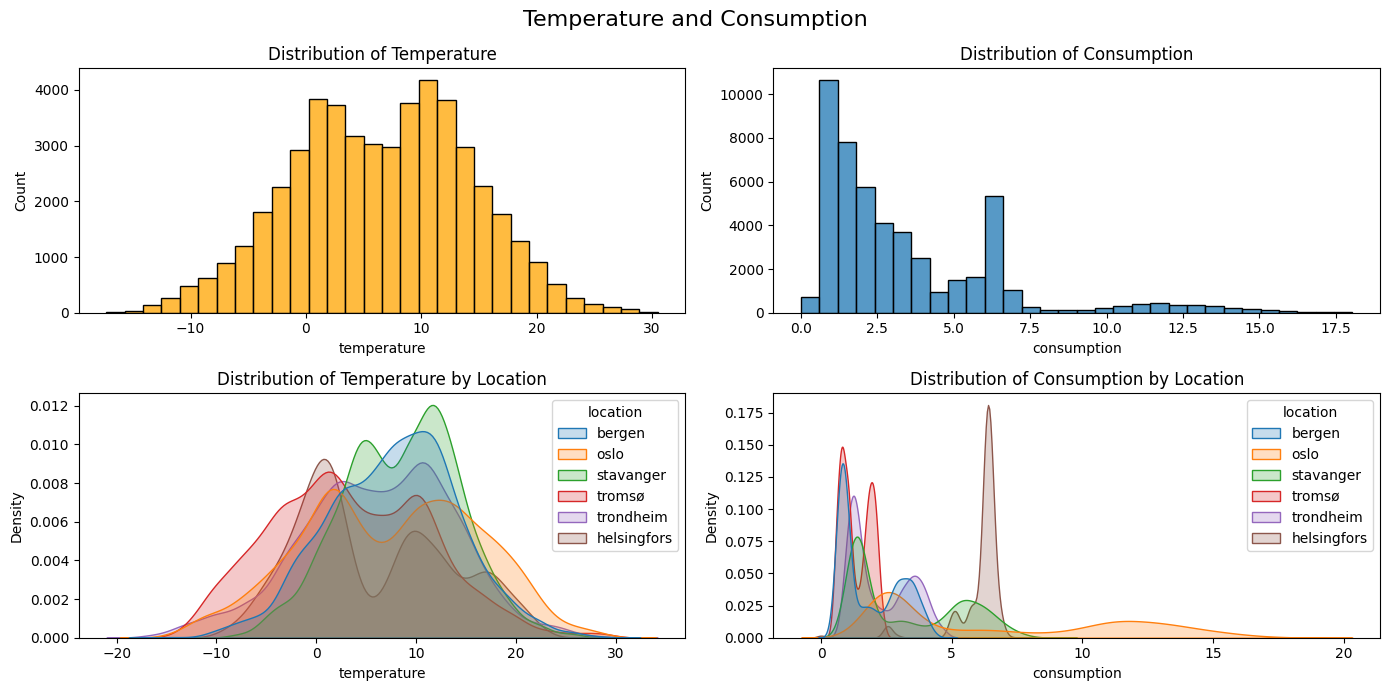

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 7))
fig.suptitle('Temperature and Consumption', fontsize=16)

sns.histplot(data['temperature'], bins=30, ax=axes[0, 0], color='orange')
axes[0, 0].set_title('Distribution of Temperature')

sns.histplot(data['consumption'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Consumption')

sns.kdeplot(data=data, x="consumption", hue="location", fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Consumption by Location')

sns.kdeplot(data=data, x="temperature", hue="location", fill=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Temperature by Location')

plt.tight_layout()
plt.show()


Distribution of Consumption: Most of the values are clustered around 0-5, with a few larger values extending the tail to the right (positive skewness).

Distribution of Temperature: The temperature distribution seems to be slightly left-skewed, with most of the values occurring between approximately -5 and 25 degrees Celsius.

#### Variation with the Location

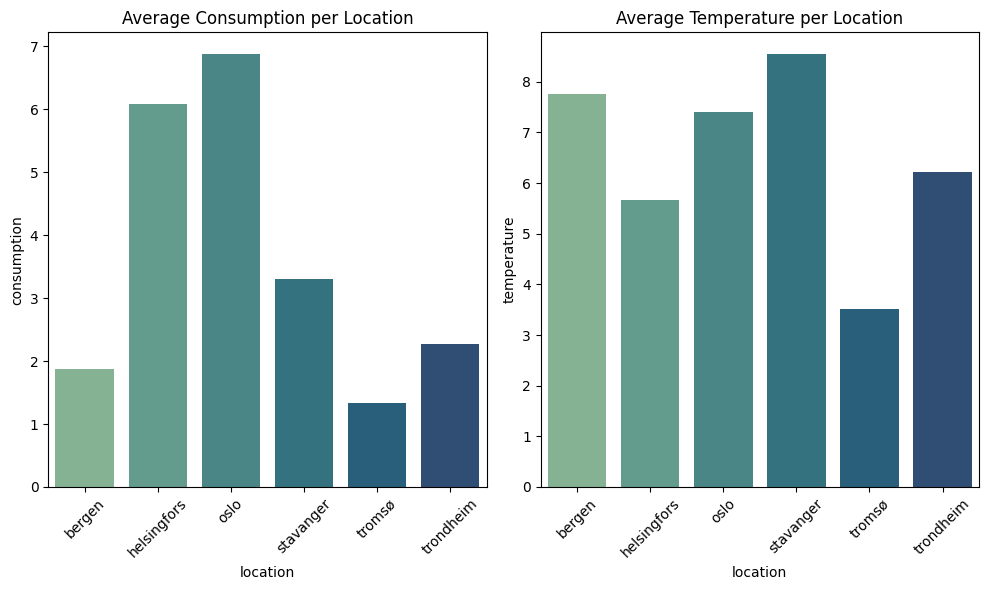

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
#fig.suptitle('Variation with Location', fontsize=16)

avg_per_location = data.groupby('location')[['consumption', 'temperature']].mean().reset_index()

sns.barplot(x='location', y='consumption', data=avg_per_location, ax=axes[0], hue='location', palette='crest')
axes[0].set_title('Average Consumption per Location')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='location', y='temperature', data=avg_per_location, ax=axes[1], hue='location', palette='crest')
axes[1].set_title('Average Temperature per Location')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Consumption: The average consumption varies significantly among different locations.
"Oslo" tends to have the highest average consumption, while "Tromsø" tends to have the lowest.

Temperature: There is also variability in the average temperature among different locations.
"Oslo" and "Stavanger" tend to be warmer on average, while "Tromsø" tends to be cooler.

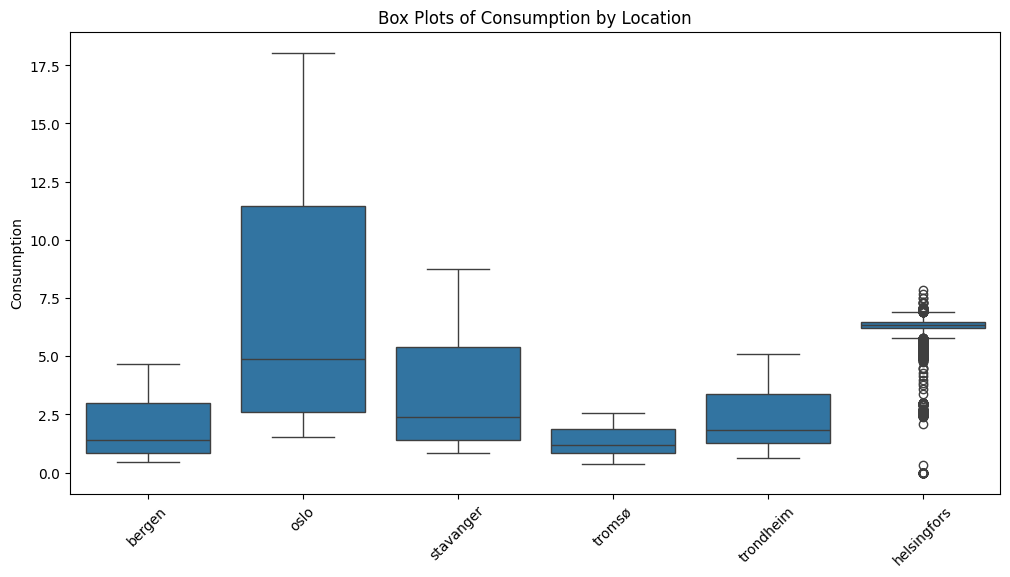

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='location', y='consumption')
plt.xlabel('')
plt.ylabel('Consumption')
plt.title('Box Plots of Consumption by Location')
plt.xticks(rotation=45)
plt.show()

#### Creating lag features and time-related features for additional analysis

In [10]:
data['time'] = pd.to_datetime(data['time'])

for lag in range(2, 25, 2):
    data[f'consumption_lag_{lag}'] = data.groupby('location')['consumption'].shift(lag)

data['hour'] = data['time'].dt.hour
data['day_of_week'] = data['time'].dt.dayofweek 
data['month'] = data['time'].dt.month

# Dropping rows with NaN values due to lagging
data = data.dropna().reset_index(drop=True)

data.head()

,time,location,consumption,temperature,consumption_lag_2,consumption_lag_4,consumption_lag_6,consumption_lag_8,consumption_lag_10,consumption_lag_12,consumption_lag_14,consumption_lag_16,consumption_lag_18,consumption_lag_20,consumption_lag_22,consumption_lag_24,hour,day_of_week,month
0,2022-04-08 21:00:00,bergen,1.080750,0.7,1.141766,1.087735,1.045292,0.931280,0.925720,0.966511,1.065699,1.131104,0.965054,0.950335,1.008794,1.113325,21,4,4
1,2022-04-08 21:00:00,oslo,3.926266,-2.0,4.087196,3.990084,3.763784,3.634216,3.646769,3.817899,4.114146,4.268502,3.638570,3.549536,3.660981,4.092830,21,4,4
2,2022-04-08 21:00:00,stavanger,1.911007,2.1,1.998722,1.992741,1.880282,1.794392,1.716986,1.792489,1.926797,2.066796,1.745010,1.744253,1.821749,2.057858,21,4,4
3,2022-04-08 21:00:00,tromsø,1.191047,-1.4,1.264833,1.239583,1.172437,1.104015,1.058377,1.054547,1.135252,1.285382,1.164006,1.140567,1.138952,1.246582,21,4,4
4,2022-04-08 21:00:00,trondheim,1.967688,0.2,2.102227,2.107002,1.958575,1.791441,1.671698,1.742925,1.881960,2.079411,1.752271,1.694300,1.747675,1.970098,21,4,4


#### Time of the Day analysis

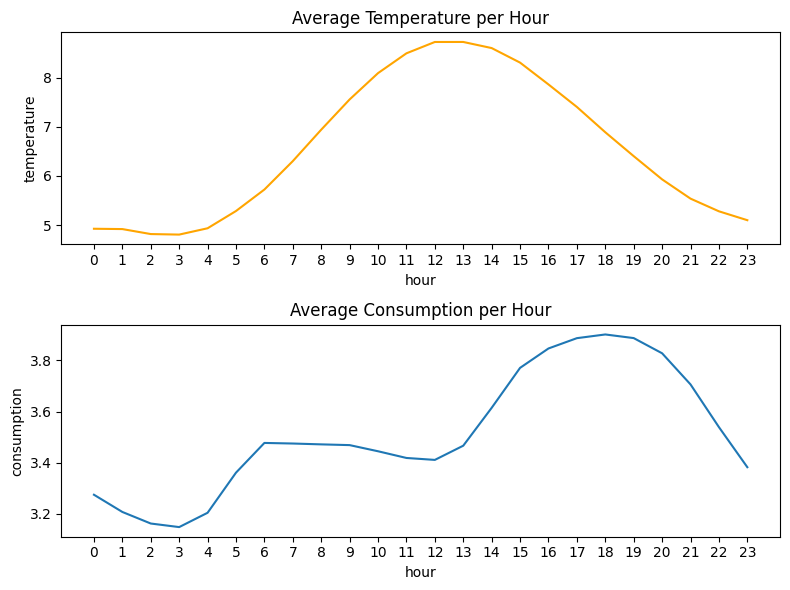

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
#fig.suptitle('Time-based Analysis', fontsize=16)

avg_hourly = data.groupby('hour')[['consumption', 'temperature']].mean().reset_index()
sns.lineplot(x='hour', y='consumption', data=avg_hourly, ax=axes[1])
axes[1].set_title('Average Consumption per Hour')
axes[1].set_xticks(range(0, 24))

sns.lineplot(x='hour', y='temperature', data=avg_hourly, ax=axes[0], color='orange')
axes[0].set_title('Average Temperature per Hour')
axes[0].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()


##### Per Hour
Consumption: It seems that there are peaks in consumption during certain hours of the day, with notable increases around 7-8 AM and 5-6 PM, which are common times for people to start and end their workdays, respectively.

Temperature: There’s a general increase in temperature during the day, peaking around midday, and a decrease during the night, which is expected due to the diurnal cycle.


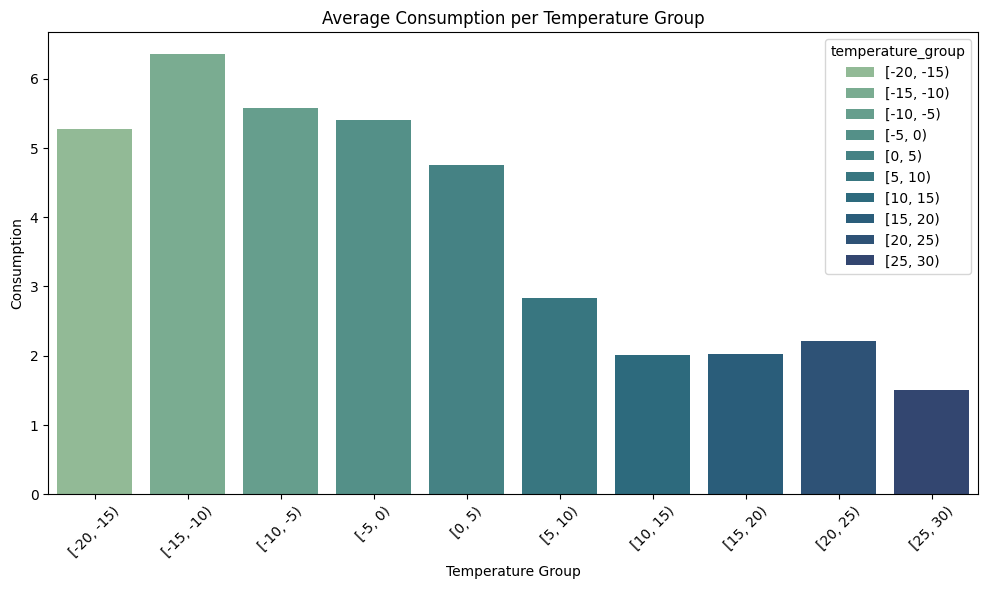

In [12]:
plt.figure(figsize=(12, 6))

temperature_bins = list(range(-20, 31, 5))
data['temperature_group'] = pd.cut(data['temperature'], bins=temperature_bins, right=False)
avg_consumption_by_tempgroup = data.groupby('temperature_group', observed=False)['consumption'].mean().reset_index()
sns.barplot(x='temperature_group', y='consumption', data=avg_consumption_by_tempgroup, hue='temperature_group', palette='crest')

plt.xlabel('Temperature Group')
plt.ylabel('Consumption')
plt.title('Average Consumption per Temperature Group')
plt.xticks(rotation=45)
plt.show()


##### Consumption per Temperature
It seems like the consumption decreases when the temperature increases. This is expected, especially in northern conditions, as a lot of the energy consumption is due to heating, which increases in colder temperatures. 


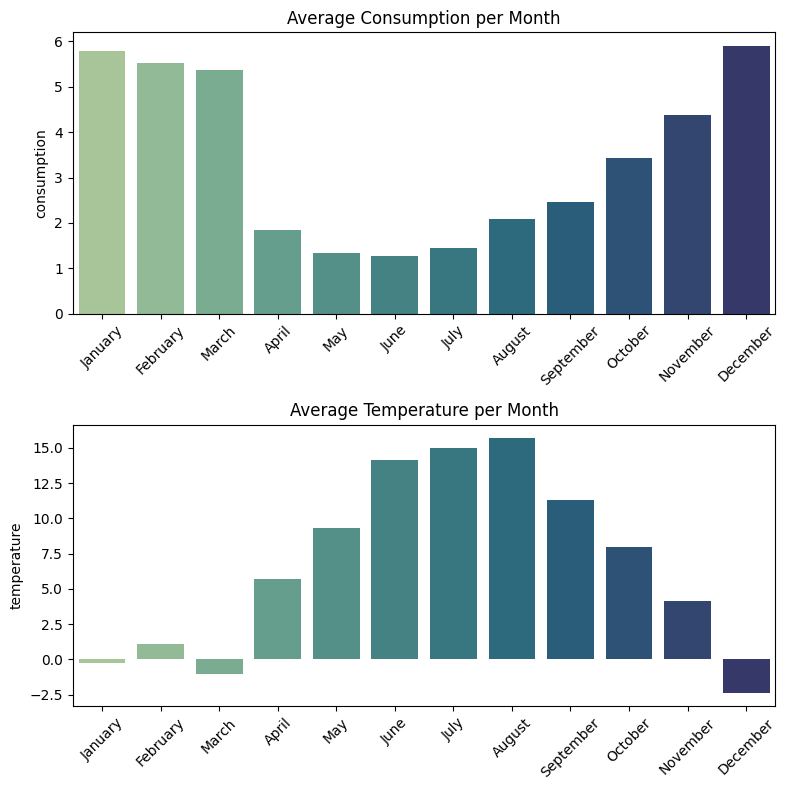

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8)) 

avg_monthly = data.groupby('month')[['consumption', 'temperature']].mean().reset_index()
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_mapping = {i+1: month for i, month in enumerate(order_months)}

avg_monthly['month_name'] = avg_monthly['month'].map(month_mapping)

sns.barplot(x='month_name', y='consumption', data=avg_monthly, ax=axes[0], hue='month', legend=False, palette='crest', order=order_months)
axes[0].set_title('Average Consumption per Month')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('')

sns.barplot(x='month_name', y='temperature', data=avg_monthly, ax=axes[1], hue='month', legend=False, palette='crest', order=order_months)
axes[1].set_title('Average Temperature per Month')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()

##### Per Month
Consumption: There's a noticeable variation in consumption throughout the year, with peaks during the colder months (e.g., January, February) and troughs during warmer months (e.g., June, July). This might suggest a relationship between temperature and consumption, potentially due to heating usage.

Temperature: As expected, the average temperature follows a clear annual cycle, with higher temperatures in the middle of the year (summer) and lower temperatures at the start and end of the year (winter).

#### Average Consumption by Day of the Week per City

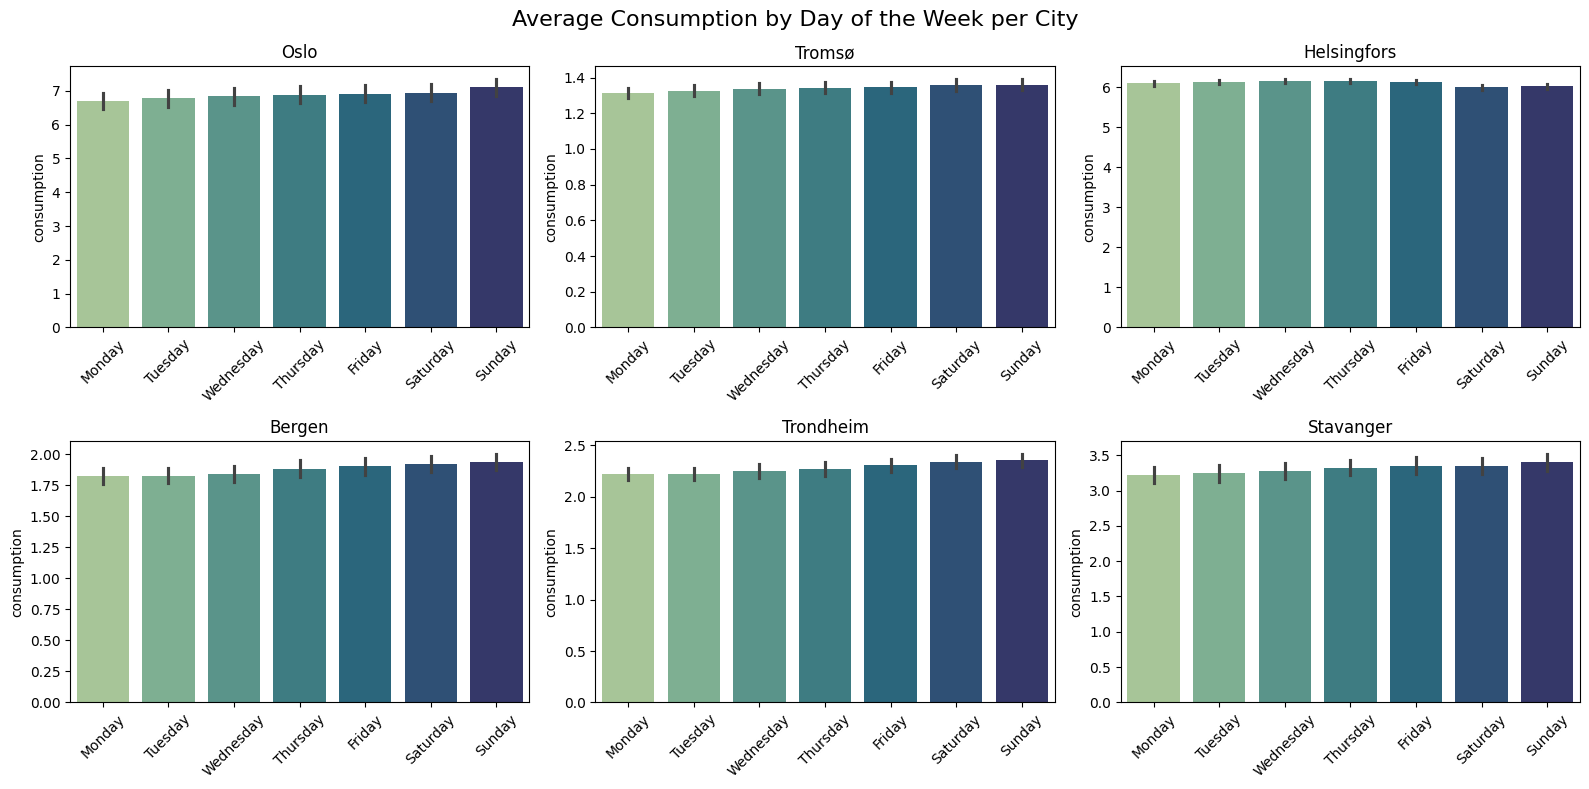

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8)) 
fig.suptitle('Average Consumption by Day of the Week per City', fontsize=16)
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(data=data[data['location'] == 'oslo'], x='day_of_week', y='consumption', palette='crest', hue='day_of_week', legend=False, ax=axes[0, 0])
axes[0, 0].set_title('Oslo')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xticks(ticks=range(7), labels=day_labels)
axes[0, 0].set_xlabel('')

sns.barplot(data=data[data['location'] == 'bergen'], x='day_of_week', y='consumption', palette='crest', hue='day_of_week', legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Bergen')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xticks(ticks=range(7), labels=day_labels)
axes[1, 0].set_xlabel('')

sns.barplot(data=data[data['location'] == 'trondheim'], x='day_of_week', y='consumption', palette='crest', hue='day_of_week', legend=False, ax=axes[1, 1])
axes[1, 1].set_title('Trondheim')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xticks(ticks=range(7), labels=day_labels)
axes[1, 1].set_xlabel('')

sns.barplot(data=data[data['location'] == 'tromsø'], x='day_of_week', y='consumption', palette='crest', hue='day_of_week', legend=False, ax=axes[0, 1])
axes[0, 1].set_title('Tromsø')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xticks(ticks=range(7), labels=day_labels)
axes[0, 1].set_xlabel('')

sns.barplot(data=data[data['location'] == 'helsingfors'], x='day_of_week', y='consumption', palette='crest', hue='day_of_week', legend=False, ax=axes[0, 2])
axes[0, 2].set_title('Helsingfors')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].set_xticks(ticks=range(7), labels=day_labels)
axes[0, 2].set_xlabel('')

sns.barplot(data=data[data['location'] == 'stavanger'], x='day_of_week', y='consumption', palette='crest', hue='day_of_week', legend=False, ax=axes[1, 2])
axes[1, 2].set_title('Stavanger')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].set_xticks(ticks=range(7), labels=day_labels)
axes[1, 2].set_xlabel('')

plt.tight_layout()
plt.show()

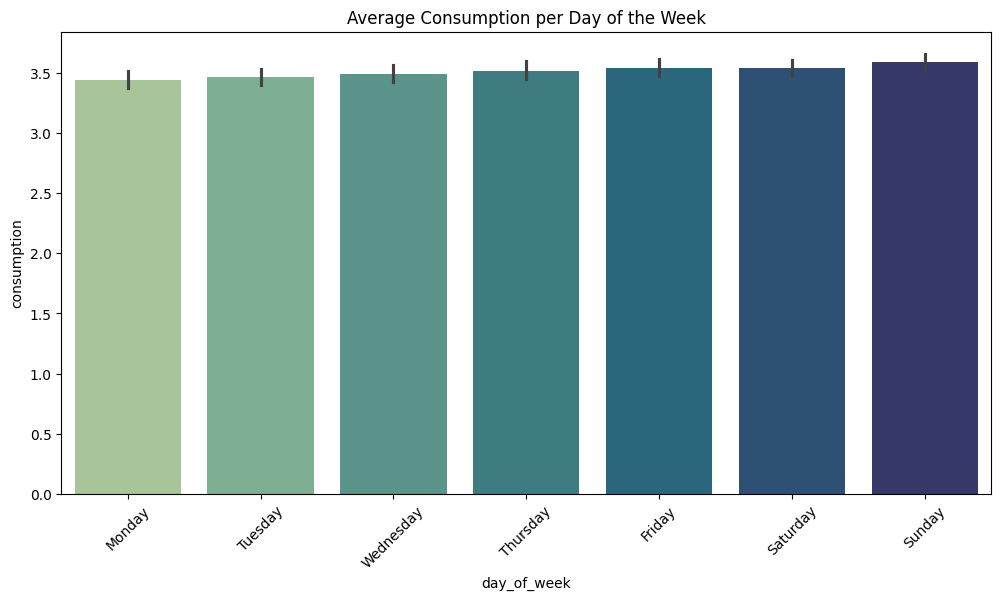

In [17]:
plt.figure(figsize=(12, 6))
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=data, x='day_of_week', y='consumption', palette='crest', hue='day_of_week', legend=False)
plt.title('Average Consumption per Day of the Week')
tick_positions = range(len(day_labels))
plt.xticks(tick_positions, day_labels, rotation=45)
plt.show()


##### Per Day
There doesn't appear to be a significant variation in consumption across different days of the week in the different cities.

### Lag features

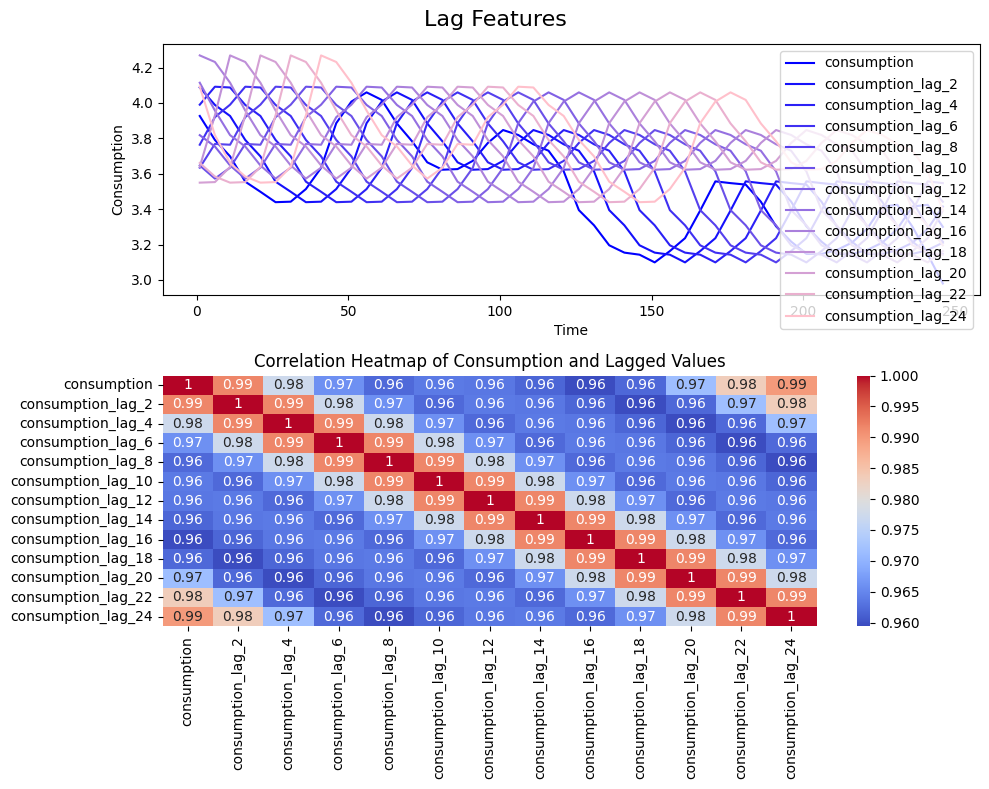

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Lag Features', fontsize=16)

data_oslo = data[data['location'] == 'oslo']

# 1. Line Plot
lags_to_plot = ['consumption'] + [f'consumption_lag_{lag}' for lag in range(2, 25, 2)]
# Define the start and end colors for the gradient (blue to pink)
start_color = 'blue'
end_color = 'pink'

# Create a gradient color scheme from start_color to end_color
colors = np.linspace(mcolors.hex2color(start_color), mcolors.hex2color(end_color), len(lags_to_plot))

data_oslo[lags_to_plot].head(50).plot(ax=axes[0], color=colors)
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Consumption')



# 3. Correlation Heatmap
lags_to_plot = ['consumption'] + [f'consumption_lag_{lag}' for lag in range(2, 25, 2)]
corr = data_oslo[lags_to_plot].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Heatmap of Consumption and Lagged Values')

plt.tight_layout()
plt.show()


Correlation Heatmap: High absolute values indicate a linear relationship with the original consumption.

In [ ]:
def time_series_decomposition(location):
    data_oslo = data[data['location'] == location.lower()]
    data_oslo.set_index('time', inplace=True)
    decomposition = sm.tsa.seasonal_decompose(data_oslo['consumption'], model='additive')

    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(data_oslo.index, data_oslo['consumption'], label='Original')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(decomposition.trend.index, decomposition.trend, label='Trend')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(decomposition.resid.index, decomposition.resid, label='Residual')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.hist(decomposition.resid, bins=30, density=True, alpha=0.7, label='Residuals Histogram')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.suptitle(f'Time Series Decomposition for {location}', y=1.02)
    plt.show()


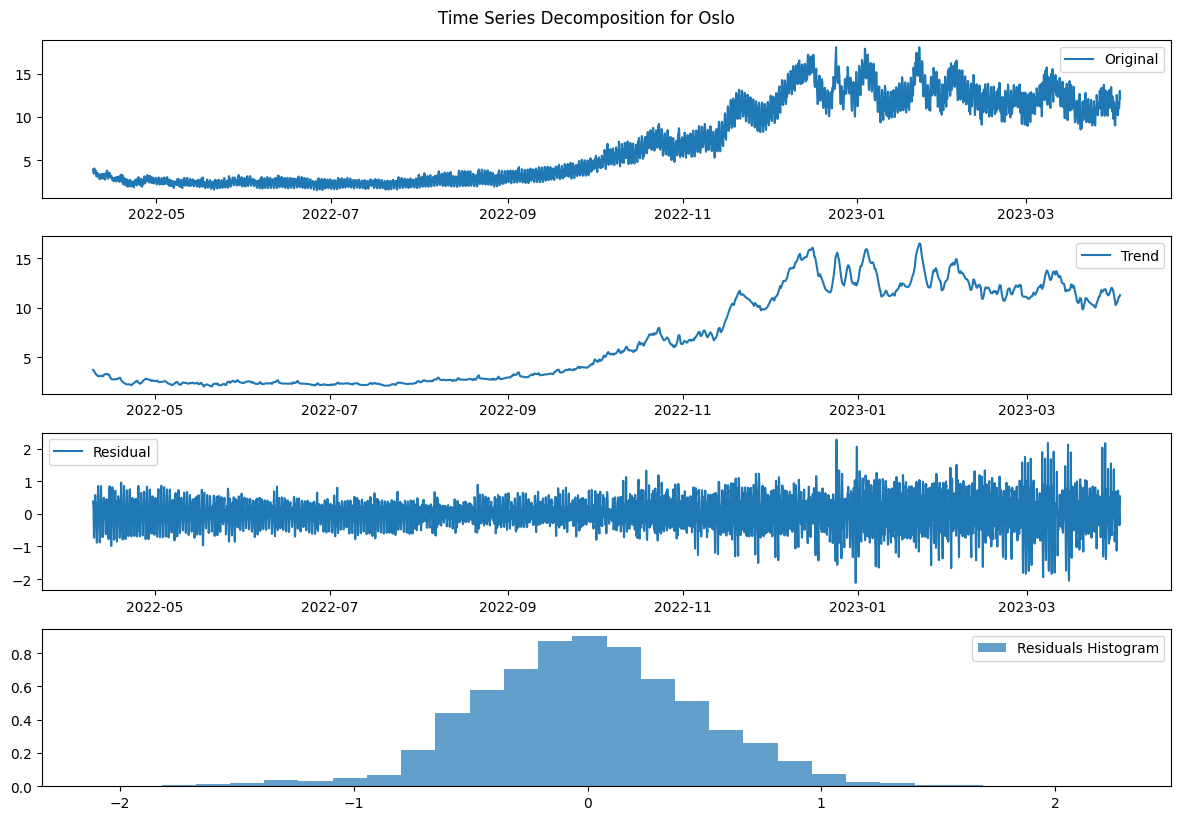

In [ ]:
time_series_decomposition('Oslo')

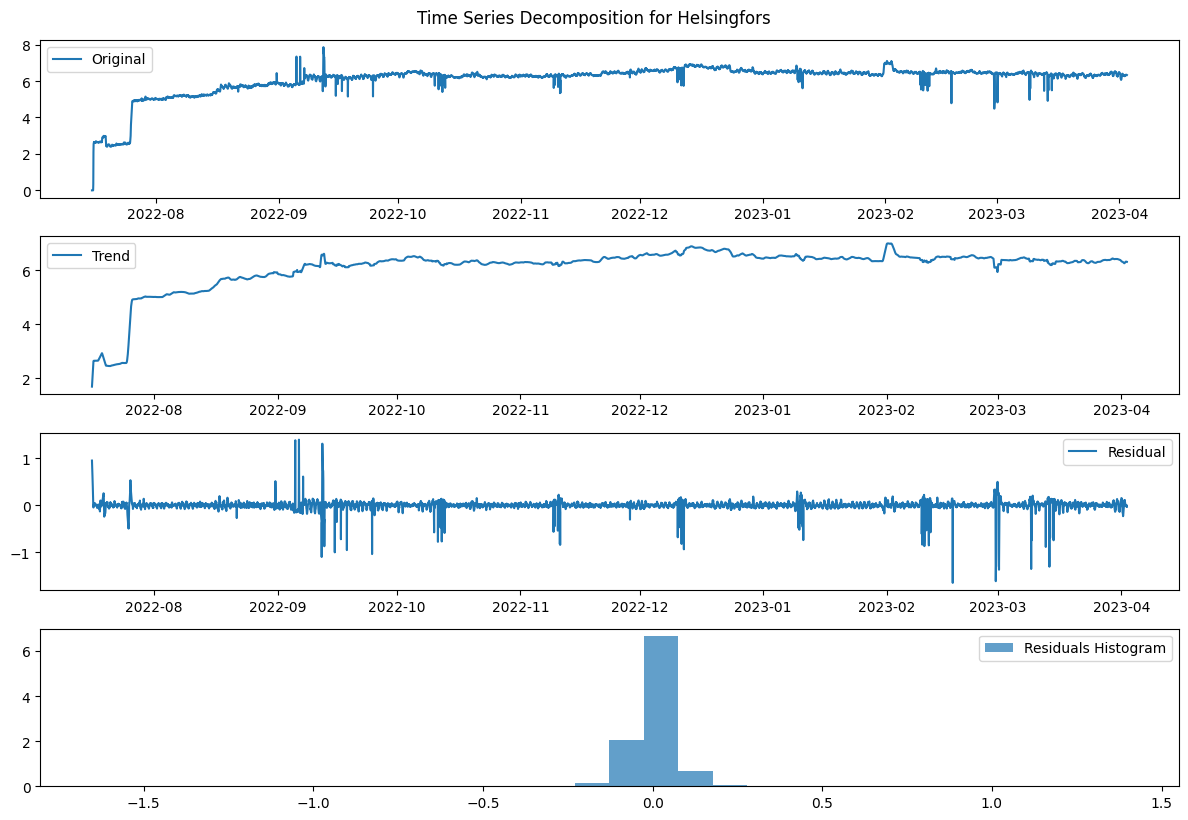

In [ ]:
time_series_decomposition('Helsingfors')

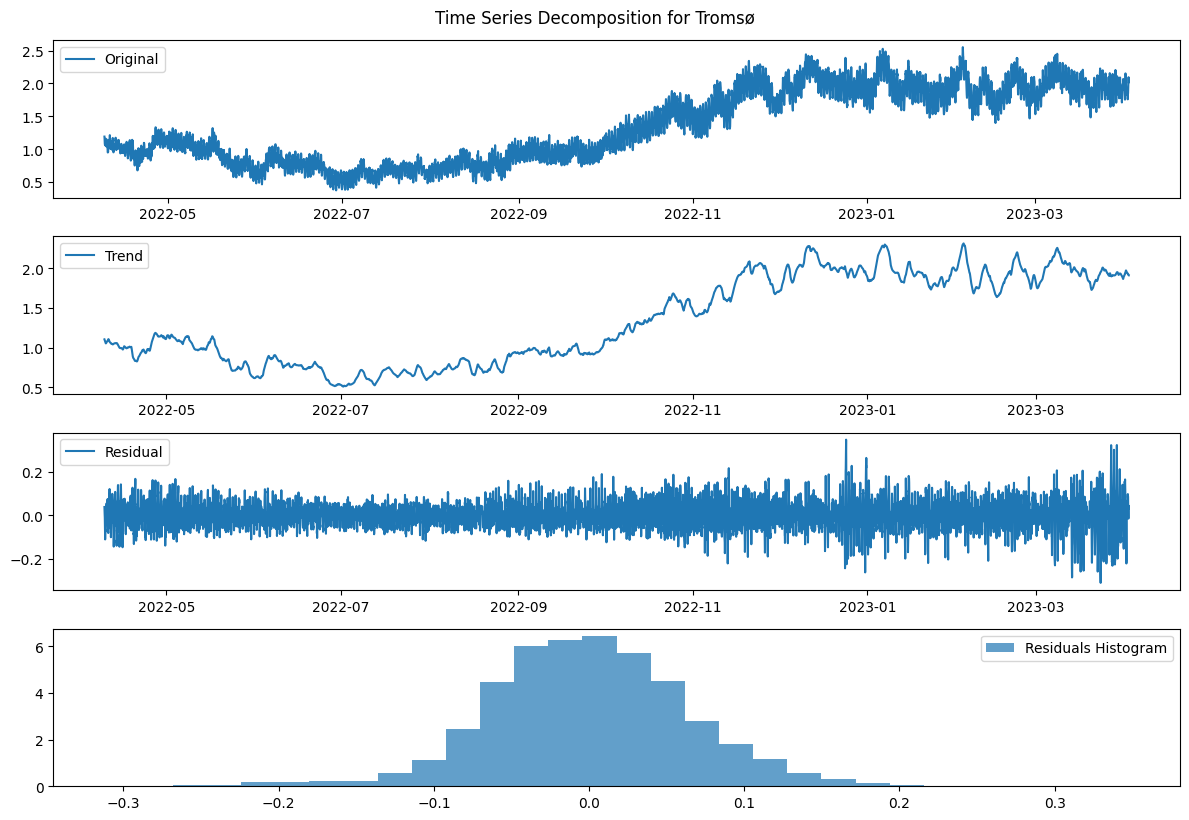

In [ ]:
time_series_decomposition('Tromsø')

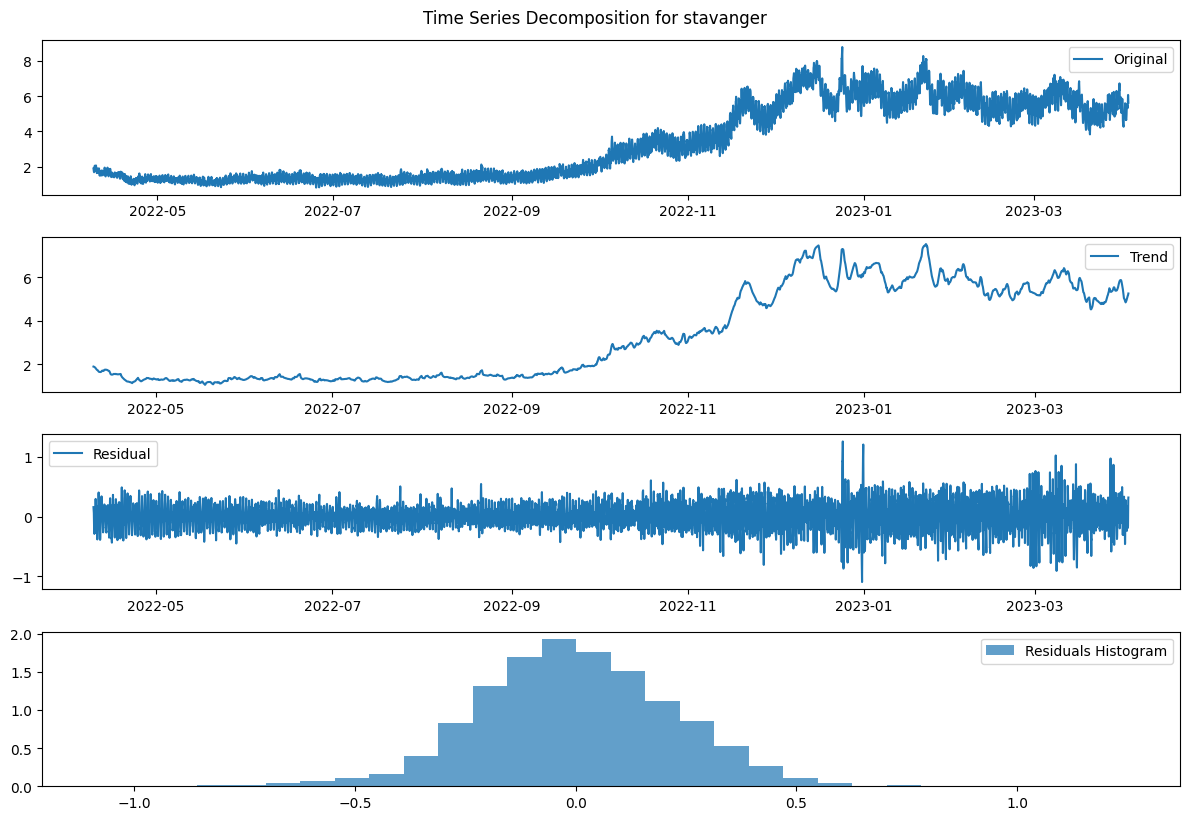

In [ ]:
time_series_decomposition('stavanger')

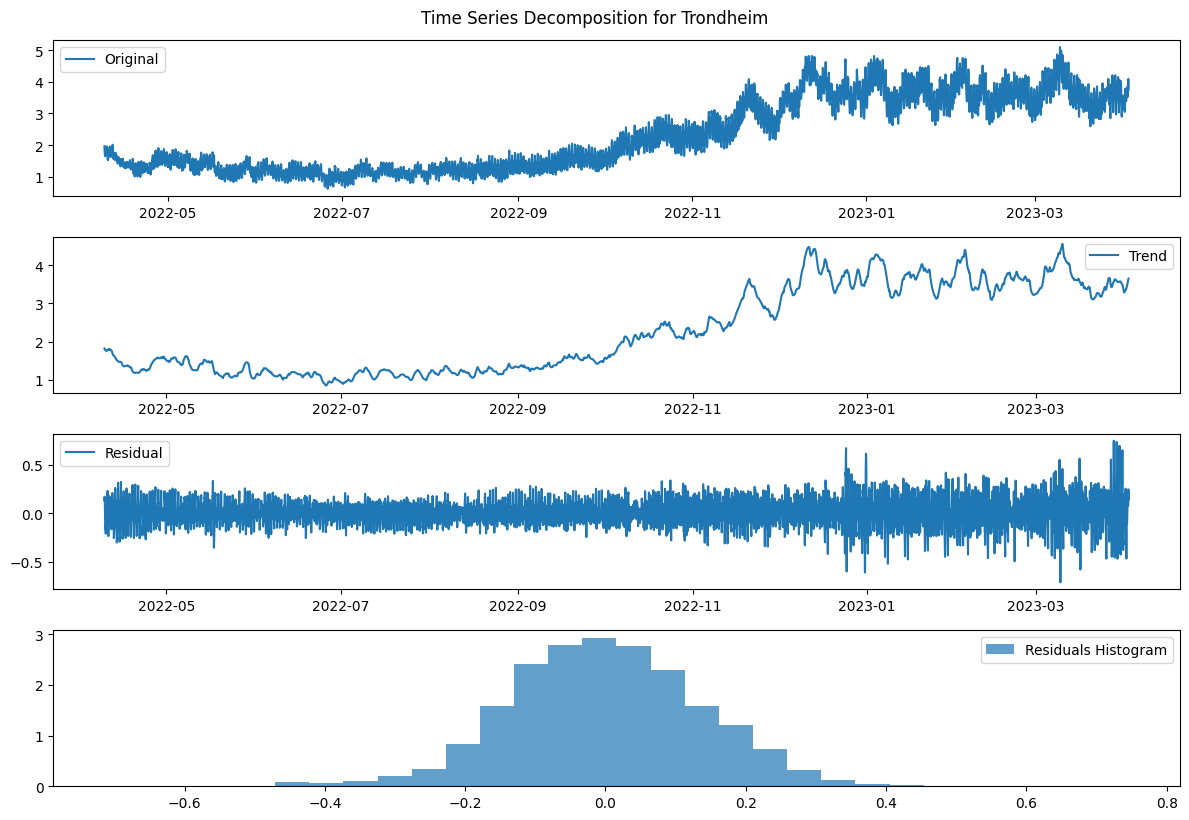

In [ ]:
time_series_decomposition('Trondheim')

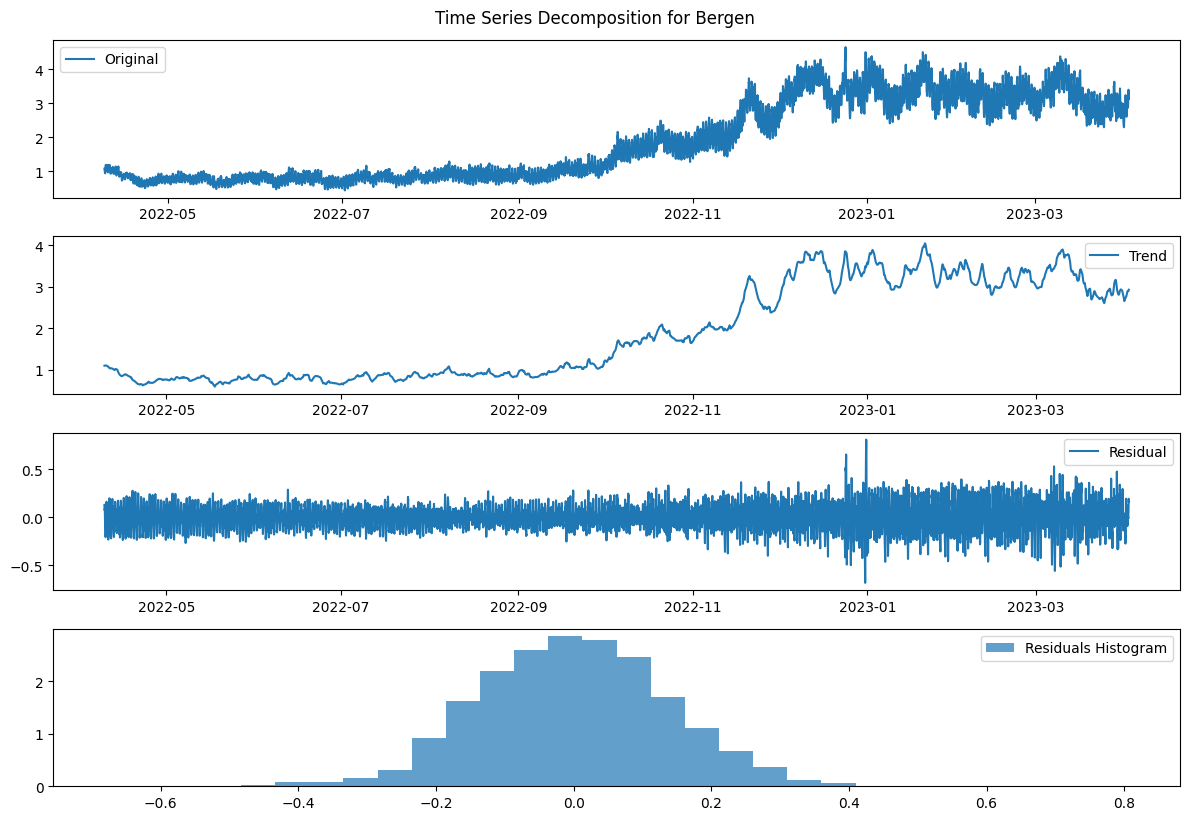

In [ ]:
time_series_decomposition('Bergen')